In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
plt.rc('font', size=14)

In [20]:
dirx = '../MulteXBI_output/J1828_PT_clear_emb/' + 'round_'+str(5)+str(0)+'_out/'

phaseR=True

trans = np.zeros([1618, 39])
phaser = np.zeros([1618, 10, 17])

for i in trange(441):
    if i+1<10:
        model_dir = dirx + 'model00000'+str(i+1)
    elif i+1<100:
        model_dir = dirx + 'model0000'+str(i+1)
    elif i+1<1000:
        model_dir = dirx + 'model000'+str(i+1)
    elif i+1<1e4:
        model_dir = dirx + 'model00'+str(i+1)
#     print(model_dir)
    try:
        trans[i] = np.loadtxt(model_dir+'/trans')[:,1]# + x_o[:,2]*np.random.randn(1, x_o.shape[0])
    except:
        print('Trans: ', model_dir)
    if phaseR:
        try:
            phases = np.loadtxt(model_dir+'/phase')
            phaser[i] = (phases[:,1:-2]/phases[:,-2:-1]).T #flatten(order='F')
        except:
            print('Phase: ', model_dir)

100%|█████████████████████████████████████████████████████████████████████| 441/441 [00:00<00:00, 706.69it/s]


### Transmission spectra

In [2]:
obs = np.loadtxt('/Users/floppityflappity/synth_obs/model000001/synth_obs011')

In [3]:
# wvl = np.loadtxt('../MulteXBI_output/wasp_43b_f_20k_2//round_00_out/model000001/trans')[:,0][:-2]
wvl=obs[:,0]

In [4]:
X = np.load('../MulteXBI_output/wasp_43b_5k_7-12//trans_round_39.npy')
# X = trans

In [5]:
medspec = np.median(X, axis=0)
p1s = np.percentile(X, 84, axis=0)
m1s = np.percentile(X, 16, axis=0)
p2s = np.percentile(X, 97.8, axis=0)
m2s = np.percentile(X, 2.2, axis=0)
p3s = np.percentile(X, 99.9, axis=0)
m3s = np.percentile(X, 0.1, axis=0)

(1.0, 1.7)

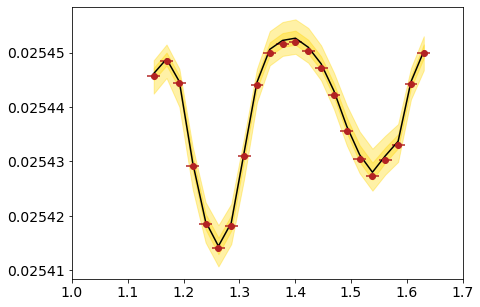

In [7]:
plt.figure(figsize=(7,5))
plt.errorbar(x=obs[:,0], y=obs[:,1], xerr=0.5*obs[:,0]/obs[:,3], yerr=obs[:,2], color='firebrick', fmt='o')
plt.plot(wvl, medspec, color='black')
plt.fill_between(wvl, p1s, m1s, color='gold', alpha=0.35)
# plt.plot(log[:,0], log[:,1])
# plt.plot(trans[:,0], trans[:,1])
plt.fill_between(wvl, p2s, m2s, color='gold', alpha=0.35)
# plt.fill_between(wvl, p3s, m3s, color='gold', alpha=0.15)
plt.xlim([1, 1.7])
# plt.ylim([0.0252, 0.0258])

### Emission spectra

In [8]:
npy = np.load('../MulteXBI_output/wasp_43b_5k_7-12//phase_round_39.npy')
# npy = phaser
# phase={}
# # phase[45] = npy[:,0]
# # phase[67.5] = npy[:,1]
# phase[90] = npy[:,2]
# # phase[112.5] = npy[:,3]
# # phase[157.5] = npy[:,4]
# phase[180] = npy[:,5]
# # phase[202.5] = npy[:,6]
# # phase[247.5] = npy[:,7]
# phase[270] = npy[:,8]
# phase[315] = npy[:,9]

In [9]:
phaseobs={}
phaseobs[45] = np.loadtxt('/Users/floppityflappity/Downloads/WASP43b_phase_3D_input_files/phase_0_125_ARCiS_units_mendoca')
phaseobs[67.5] = np.loadtxt('/Users/floppityflappity/Downloads/WASP43b_phase_3D_input_files/phase_0_1875_ARCiS_units_mendoca')
phaseobs[90] = np.loadtxt('/Users/floppityflappity/Downloads/WASP43b_phase_3D_input_files/phase_0_25_ARCiS_units_nospitz')
phaseobs[112.5] = np.loadtxt('/Users/floppityflappity/Downloads/WASP43b_phase_3D_input_files/phase_0_3125_ARCiS_units_mendoca')
phaseobs[157.5] = np.loadtxt('/Users/floppityflappity/Downloads/WASP43b_phase_3D_input_files/phase_0_4375_ARCiS_units_mendoca')
phaseobs[180] = np.loadtxt('/Users/floppityflappity/Downloads/WASP43b_phase_3D_input_files/phase_0_5_ARCiS_units_mendoca')
phaseobs[202.5] = np.loadtxt('/Users/floppityflappity/Downloads/WASP43b_phase_3D_input_files/phase_0_5625_ARCiS_units_mendoca')
phaseobs[247.5] = np.loadtxt('/Users/floppityflappity/Downloads/WASP43b_phase_3D_input_files/phase_0_6875_ARCiS_units_mendoca')
phaseobs[270] = np.loadtxt('/Users/floppityflappity/Downloads/WASP43b_phase_3D_input_files/phase_0_75_ARCiS_units_mendoca')
phaseobs[315] = np.loadtxt('/Users/floppityflappity/Downloads/WASP43b_phase_3D_input_files/phase_0_875_ARCiS_units_mendoca')

In [10]:
angles = [45,67.5,90,112.5,157.5,180,202.5,247.5,270,315]
phase={}
wvl_done=0
for i in range(len(angles)):
    nwvl = len(phaseobs[angles[i]])
    phase[angles[i]] = npy[:, wvl_done:wvl_done+nwvl]
    wvl_done+=nwvl

In [11]:
nolog=np.loadtxt('../log_vs_nolog/model000001/phase')
log=np.loadtxt('../log_vs_nolog/model000002/phase')

In [12]:
obs001 = np.loadtxt('../log_vs_nolog/model000002/obs001')

In [13]:
no_log={}
yes_log = {}
for i in range(len(angles)):
    no_log[angles[i]] = nolog[:,i+1]/nolog[:,-2]
    yes_log[angles[i]] = log[:,i+1]/log[:,-2]

In [14]:
synthphaseobs={}
synthphaseobs[45] = np.loadtxt('/Users/floppityflappity/synth_WASP-43b_F/synth_phase_45.dat')
synthphaseobs[67.5] = np.loadtxt('/Users/floppityflappity/synth_WASP-43b_F/synth_phase_67.5.dat')
synthphaseobs[90] = np.loadtxt('/Users/floppityflappity/synth_WASP-43b_F/synth_phase_90.dat')
synthphaseobs[112.5] = np.loadtxt('/Users/floppityflappity/synth_WASP-43b_F/synth_phase_112.5.dat')
synthphaseobs[157.5] = np.loadtxt('/Users/floppityflappity/synth_WASP-43b_F/synth_phase_157.5.dat')
synthphaseobs[180] = np.loadtxt('/Users/floppityflappity/synth_WASP-43b_F/synth_phase_180.dat')
synthphaseobs[202.5] = np.loadtxt('/Users/floppityflappity/synth_WASP-43b_F/synth_phase_202.5.dat')
synthphaseobs[247.5] = np.loadtxt('/Users/floppityflappity/synth_WASP-43b_F/synth_phase_247.5.dat')
synthphaseobs[270] = np.loadtxt('/Users/floppityflappity/synth_WASP-43b_F/synth_phase_270.dat')
synthphaseobs[315] = np.loadtxt('/Users/floppityflappity/synth_WASP-43b_F/synth_phase_315.dat')

In [15]:
synthphaseobs={}
synthphaseobs[45] = np.loadtxt('/Users/floppityflappity/synth_obs/model000001/synth_obs001')
synthphaseobs[67.5] = np.loadtxt('/Users/floppityflappity/synth_obs/model000001/synth_obs002')
synthphaseobs[90] = np.loadtxt('/Users/floppityflappity/synth_obs/model000001/synth_obs003')
synthphaseobs[112.5] = np.loadtxt('/Users/floppityflappity/synth_obs/model000001/synth_obs004')
synthphaseobs[157.5] = np.loadtxt('/Users/floppityflappity/synth_obs/model000001/synth_obs005')
synthphaseobs[180] = np.loadtxt('/Users/floppityflappity/synth_obs/model000001/synth_obs006')
synthphaseobs[202.5] = np.loadtxt('/Users/floppityflappity/synth_obs/model000001/synth_obs007')
synthphaseobs[247.5] = np.loadtxt('/Users/floppityflappity/synth_obs/model000001/synth_obs008')
synthphaseobs[270] = np.loadtxt('/Users/floppityflappity/synth_obs/model000001/synth_obs009')
synthphaseobs[315] = np.loadtxt('/Users/floppityflappity/synth_obs/model000001/synth_obs010')

In [16]:
medphase = {}
p1s = {}
m1s = {}
p2s = {}
m2s = {}
p3s = {}
m3s = {}

plot=[45, 67.5, 90, 112.5, 180, 202.5, 247.5, 270, 315]
# colors = ['darkorange', 'lightblue', 'mediumvioletred', 'forestgreen', 'yellow']
colors = ['royalblue', 'dodgerblue', 'mediumorchid', 'gold', 'orange', 'red', 'coral', 'palevioletred', 'slateblue']

for i in plot:
    medphase[i] = np.median(phase[i], axis=0)
    p1s[i] = np.percentile(phase[i], 84, axis=0)
    m1s[i] = np.percentile(phase[i], 16, axis=0)
    p2s[i] = np.percentile(phase[i], 97.8, axis=0)
    m2s[i] = np.percentile(phase[i], 2.2, axis=0)
    p3s[i] = np.percentile(phase[i], 99.9, axis=0)
    m3s[i] = np.percentile(phase[i], 0.1, axis=0)

(1.06, 1.7)

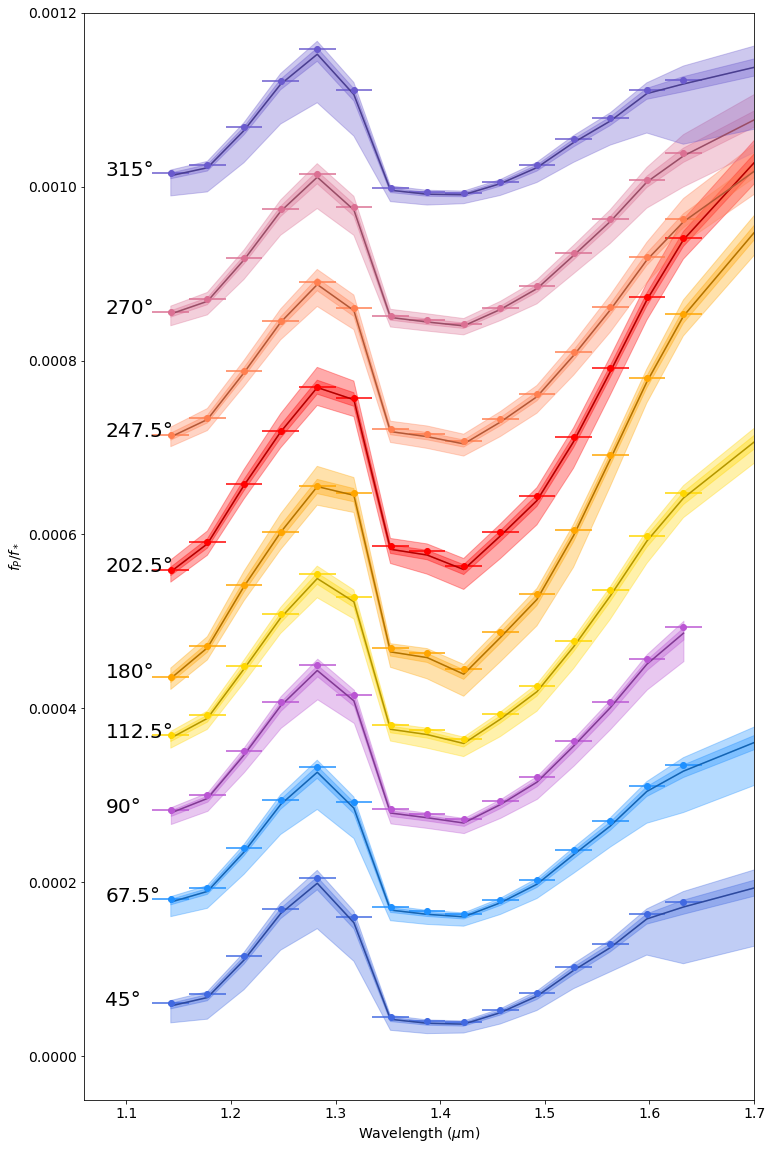

In [29]:
plt.figure(figsize=(12,20))
offset=0
for i in range(len(plot)):
    if i>0:
        offset+=0.00007-m2s[plot[i]][4]+p2s[plot[i-1]][4]
#     plt.errorbar(x=phaseobs[plot[i]][:,0], y=phaseobs[plot[i]][:,1], xerr=0.5*phaseobs[plot[i]][:,0]/phaseobs[plot[i]][:,3], 
#                  yerr=phaseobs[plot[i]][:,2], color=colors[i], fmt='o',label='Phase: '+str(plot[i]))
    plt.errorbar(x=synthphaseobs[plot[i]][:,0], y=synthphaseobs[plot[i]][:,1]+offset, 
                 xerr=0.5*synthphaseobs[plot[i]][:,0]/synthphaseobs[plot[i]][:,3], yerr=synthphaseobs[plot[i]][:,2], 
                 color=colors[i], fmt='o', label='Phase: '+str(plot[i]))

    plt.plot(synthphaseobs[plot[i]][:,0], medphase[plot[i]]+offset, color=colors[i])
#     plt.plot(nolog[:,0], no_log[plot[i]]+offset, color=colors[i])
#     plt.plot(log[:,0], yes_log[plot[i]]+offset, ':', color=colors[i])
#     plt.plot(obs001[:,0], obs001[:,1], 'k')
    plt.text(1.08, medphase[plot[i]][0]+offset, str(plot[i])+'°', fontsize='x-large')
    plt.plot(synthphaseobs[plot[i]][:,0], medphase[plot[i]]+offset, color='k', alpha=0.3)
    plt.fill_between(synthphaseobs[plot[i]][:,0], p1s[plot[i]]+offset, m1s[plot[i]]+offset, color=colors[i], 
                     alpha=0.35)
    plt.fill_between(synthphaseobs[plot[i]][:,0], p2s[plot[i]]+offset, m2s[plot[i]]+offset, color=colors[i], 
                     alpha=0.33)
#     plt.fill_between(synthphaseobs[plot[i]][:,0], p3s[plot[i]]+offset, m3s[plot[i]]+offset, color=colors[i], alpha=0.15)
#     offset+=max(synthphaseobs[plot[i]][:,1][:-2])-min(synthphaseobs[plot[i]][:,1][:-2])

plt.ylabel(r'$f_P/f_*$')
plt.xlabel(r'Wavelength ($\mu$m)')
# plt.legend()
# plt.title('Phase: '+str(plot[i]))

# #No Spitzer
plt.ylim([-0.00005,0.0012])
plt.xlim([1.06,1.7])
# #Spitzer
# plt.xlim([0.9, 6])
# plt.ylim([0,0.007])

In [34]:
synth = ["phase_0_125_ARCiS_units_mendoca", "phase_0_1875_ARCiS_units_mendoca", "phase_0_25_ARCiS_units_nospitz", "phase_0_3125_ARCiS_units_mendoca", 
         "phase_0_4375_ARCiS_units_mendoca", "phase_0_5_ARCiS_units_mendoca", "phase_0_5625_ARCiS_units_mendoca", 
         "phase_0_6875_ARCiS_units_mendoca", "phase_0_75_ARCiS_units_mendoca", "phase_0_875_ARCiS_units_mendoca", 
         "WASP_43b_ARCiS.dat"]
dirx = '../synth_obs/model000001/'
for j in range(11):
    if j+1<10:
        obsn = 'obs00'+str(j+1)
    elif j+1<100:
        obsn = 'obs0'+str(j+1)
    obsf = np.loadtxt(dirx+obsn)
    specRi = np.loadtxt('../Downloads/WASP43b_phase_3D_input_files/'+synth[j])[:,-1]
    obsf[:,3] = specRi
    obsf[:,2] = np.zeros(len(obsf[:,0]))
    np.savetxt(dirx+'synth_'+obsn, obsf)

In [ ]:
for i in range(11):
    obs = np.loadtxt('../log_vs_nolog/model000002/obs001')

In [42]:
3//3

1

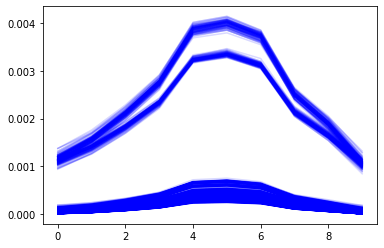

In [271]:
for i in range(100):
    plt.plot(npy[i], 'b', alpha=0.15)

In [302]:
T = np.arange(2500, 10000, 500)
d_planet = np.arange(0.01, 0.5, 0.05)
Rstar = 0.667

Energy emitted by star: $$ L_{*} = 4\pi R_*^2\sigma T_*^4 $$

Energy received by planet: $$ I_P = \frac{L_*}{4d_{planet}^2}R_P^2 $$

In [285]:
import astropy.units as u
import astropy.constants as c

def Lstar(Tstar, Rstar):
        return 4*np.pi*((Rstar*u.Rsun).to(u.m))**2*c.sigma_sb*(Tstar*u.K)**4
    
def 

In [286]:
Lstar(5000, 1)

<Quantity 2.15548808e+26 W>

In [299]:
def Teq(Rstar, a, Tstar):
    return np.sqrt((Rstar*u.Rsun).to(u.m)/(2*a*u.AU).to(u.m))*Tstar

In [315]:
Teq(Rstar, 0.5, T)

<Quantity [139.23589837, 167.08307804, 194.93025771, 222.77743739,
           250.62461706, 278.47179673, 306.31897641, 334.16615608,
           362.01333575, 389.86051543, 417.7076951 , 445.55487478,
           473.40205445, 501.24923412, 529.0964138 ]>